In [589]:
import numpy as np 

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.fft import fft, ifft

Defining  $\alpha = 1 + mod(260, 4)$

In [590]:
alpha = 1 + 260%4 

Question 1


In [591]:
t = np.linspace(0, 10, 1000)

In [592]:
def x_fun(t, a):
    x = np.exp(-1*t/a)
    return x

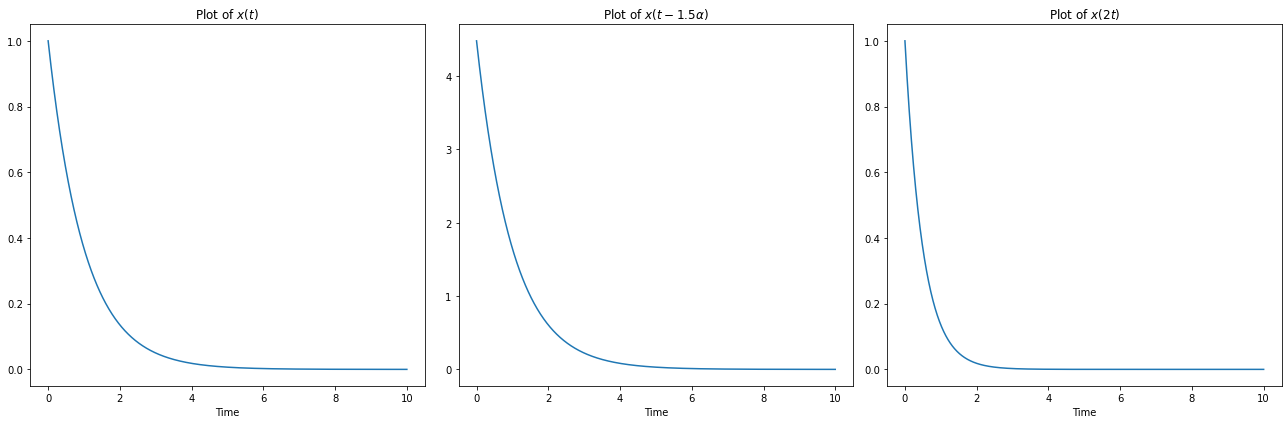

In [638]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(t,x_fun(t,alpha),label = "$x(t)$")
plt.title("Plot of $x(t)$ ")
plt.xlabel("Time")
plt.subplot(1,3,2)

plt.plot(t,x_fun(t-1.5*alpha,alpha),label = r"$x(t-1.5\alpha)$")
plt.xlabel("Time")
plt.title(r"Plot of $x(t-1.5\alpha)$")

plt.subplot(1,3,3)
plt.plot(t,x_fun(2*t,alpha), label = "$x(2t)$")
plt.title("Plot of $x(2t)$")
plt.xlabel("Time")
plt.tight_layout()
plt.savefig("Q1_1")

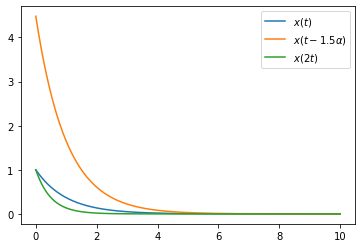

In [628]:
plt.plot(t,x_fun(t,alpha),label = "$x(t)$")
plt.plot(t,x_fun(t-1.5*alpha,alpha),label = r"$x(t-1.5\alpha)$")
plt.plot(t,x_fun(2*t,alpha), label = "$x(2t)$")
plt.legend()

In [594]:
def plot(y, x = None, title = None, xlabel = None, ylabel = None):
    if x is not None:
        plt.plot(x,y)
    else:
        plt.plot(y)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return


In [595]:
def fourier_x(alpha,a = None, to = None, delayed = True):
    if a is None and to is None:
        w = np.linspace(-2*np.pi, 2*np.pi, 1000)
        x_fourier = 1/((1/alpha) + 1j*w)
        plt.subplot(2,1,1)
        plt.plot(w, np.abs(x_fourier))
        plt.xlabel(r"$\Omega$")
        plt.ylabel(r"$|F(\Omega)|$")
        plt.title("Amplitude Spectrum of $x(t)$")
        plt.subplot(2,1,2)
        plt.xlabel(r"$\Omega$")
        plt.ylabel(r"$ \angle F(\Omega)$")
        plt.title("Phase Spectrum of $x(t)$")
        plt.plot(w, np.angle(x_fourier))
        plt.tight_layout()
        return
    if a is not None:
        w = np.linspace(-2*np.pi, 2*np.pi, 1000)
        x_fourier = (1/np.abs(a))*(1/((1/alpha) + (1j*w/a)))
        plt.subplot(2,1,1)
        plt.plot(w, np.abs(x_fourier))
        plt.xlabel(r"$\Omega$")
        plt.ylabel(r"$|F(\Omega)|$")
        plt.title("Amplitude Spectrum of $x({}t)$".format(a))
        plt.subplot(2,1,2)
        plt.xlabel(r"$\Omega$")
        plt.ylabel(r"$ \angle F(\Omega)$")
        plt.title("Phase Spectrum of $x({}t)$".format(a))
        plt.plot(w, np.angle(x_fourier))
        plt.tight_layout()
        return
    if to is not None:
        w = np.linspace(-2*np.pi, 2*np.pi, 1000)
        x1 = 1/((1/alpha) + 1j*w)
        x2 = np.exp(-1j*w*to)
        x_fourier = np.multiply(x1,x2)
        plt.subplot(2,1,1)
        plt.plot(w, np.abs(x_fourier))
        plt.xlabel(r"$\Omega$")
        plt.ylabel(r"$|F(\Omega)|$")
        plt.title(r"Amplitude Spectrum of $x(t-{}\alpha)$".format(to/alpha))
        plt.subplot(2,1,2)
        plt.xlabel(r"$\Omega$")
        plt.ylabel(r"$ \angle F(\Omega)$")
        plt.title(r"Phase Spectrum of $x(t-{}\alpha)$".format(to/alpha))
        plt.plot(w, np.angle(x_fourier))
        plt.tight_layout()
        return
        

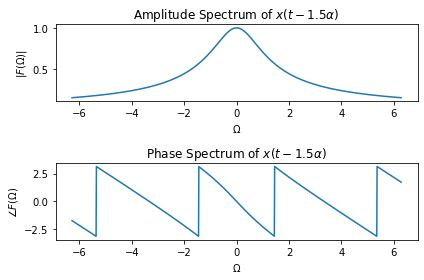

In [640]:
fourier_x(alpha)
plt.subplot(1,3,2)
fourier_x(alpha, to = 1.5*alpha)
#plt.savefig("Q1_2")

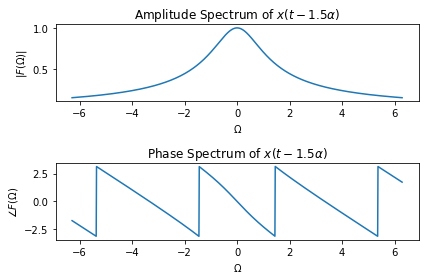

In [597]:
fourier_x(alpha, to = 1.5*alpha)
#plt.savefig("Q1_3")

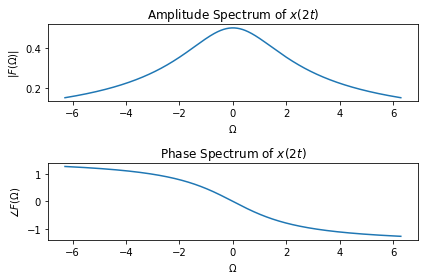

In [598]:
fourier_x(alpha, a =2)
#plt.savefig("Q1_4")

Question 2

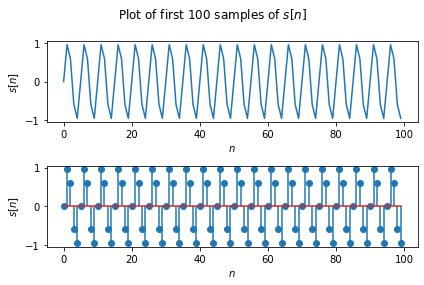

In [599]:
N = 5000
T = 0.001
freq_1 = 200*alpha
freq_2 = 220*alpha

omega_1 = 2*np.pi*freq_1
omega_2 = 2*np.pi*freq_2

t_vec = np.arange(N)*T

s1 = np.sin(omega_1*t_vec)
s2 = np.sin(omega_2*t_vec)
s = np.hstack((s1, s2))
wavfile.write("Appended_signal.wav", int(1/T), s.astype(np.int16))

s_graph = s[:100]

plt.subplot(2,1,1)
plt.plot(s_graph)
plt.xlabel("$n$")
plt.ylabel("$s[n]$")
plt.subplot(2,1,2)
plt.stem(s_graph)
plt.xlabel("$n$")
plt.ylabel("$s[n]$")
plt.suptitle("Plot of first 100 samples of $s[n]$")
plt.tight_layout()
plt.savefig("Q2.jpg")



Question 3

In [611]:
Fs, track = wavfile.read("Track001.wav")
print(Fs)
print(track.shape)
track = track/32767.0
IPython.display.Audio(track, rate = Fs)

44100
(485100,)


In [612]:
text_data = np.loadtxt("ConvFile1.txt")
y = sp.convolve(track, text_data)
IPython.display.Audio(y, rate = Fs)

In [613]:
y_valid = sp.convolve(track, text_data, mode = 'valid')
IPython.display.Audio(y_valid, rate = Fs)

In [614]:
y_same = sp.convolve(track, text_data, mode = 'same')
IPython.display.Audio(y_same, rate = Fs)

In [615]:
wavfile.write("Convolved_signal_mode_full.wav", 44100,(y*32767).astype(np.int16))
wavfile.write("Convolved_signal_mode_valid.wav", 44100,(y_valid*32767).astype(np.int16))
wavfile.write("Convolved_signal_mode_same.wav", 44100,(y_same*32767).astype(np.int16))

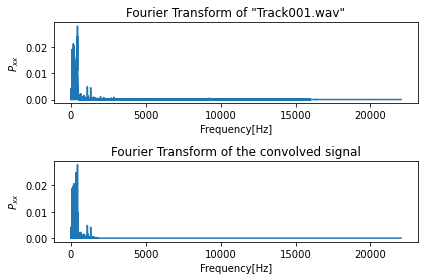

In [616]:
fourier_track = np.fft.fft(track)[0:int(len(track)/2)]/len(track)
fourier_track[1:] = 2*fourier_track[1:]
Pxx_track = np.abs(fourier_track)
f_track = Fs*np.arange(len(track)/2)/len(track)

fourier_y = np.fft.fft(y)[0:int(len(y)/2)]/len(y)
fourier_y[1:] = 2*fourier_y[1:]
Pxx_y = np.abs(fourier_y)
f_y = Fs*np.arange(len(y)/2)/len(y)

plt.subplot(2,1,1)
plt.plot(f_track,Pxx_track)
plt.title("Fourier Transform of \"Track001.wav\"")
plt.xlabel("Frequency[Hz]")
plt.ylabel(r"$P_{xx}$")
plt.subplot(2,1,2)
plt.plot(f_y, Pxx_y)
plt.title("Fourier Transform of the convolved signal")
plt.xlabel("Frequency[Hz]")
plt.ylabel(r"$P_{xx}$")
plt.tight_layout()
plt.savefig("Q3")

It is observed that the text file ConvFile1.txt contains the impulse response of a low pass filter 

Question 4

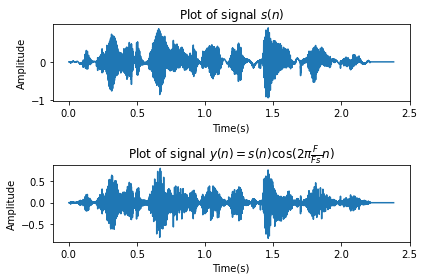

In [652]:
Fs, s = wavfile.read("speech.wav")
s = s/32767.0
t_vec = np.arange(len(s))*(1/Fs)
plt.subplot(2,1,1)
plt.plot(t_vec,s)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Plot of signal $s(n)$")

F = 500
y = multiply_signals(s, Fs, F)
plt.subplot(2,1,2)
plt.plot(t_vec,y)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title(r"Plot of signal $y(n) = s(n)\cos(2\pi\frac{F}{Fs}n)$")
plt.tight_layout()
plt.savefig("Q4_1")

IPython.display.Audio(s, rate = Fs)

In [645]:
def multiply_signals(s, Fs, F):
    w = 2*np.pi*float(F)/Fs
    y = np.cos(w * np.arange(0,len(s)))
    return np.multiply(s,y)   

In [653]:
F = 500
y = multiply_signals(s, Fs, F)
IPython.display.Audio(y, rate = Fs)


In [655]:
wavfile.write("Modulated_signal.wav",Fs, (y*32767.0).astype(np.int16))

Modultated signal sounds like an Alien

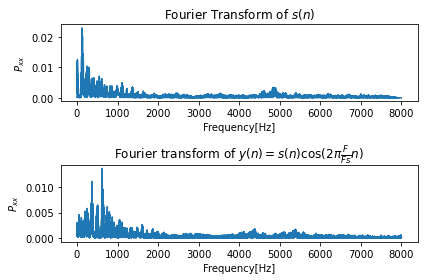

In [609]:
fourier_s = np.fft.fft(s)[0:int(len(s)/2)]/len(s)
fourier_s[1:] = 2*fourier_s[1:]
Pxx_s = np.abs(fourier_s)
f_s = Fs*np.arange(len(s)/2)/len(s)
plt.subplot(2,1,1)
plt.plot(f_s,Pxx_s)
plt.title("Fourier Transform of $s(n)$")
plt.xlabel("Frequency[Hz]")
plt.ylabel(r"$P_{xx}$")
fourier_y = np.fft.fft(y)[0:int(len(y)/2)]/len(y)
fourier_y[1:] = 2*fourier_y[1:]
Pxx_y = np.abs(fourier_y)
f_y = Fs*np.arange(len(y)/2)/len(y)
plt.subplot(2,1,2)
plt.plot(f_y, Pxx_y)
plt.title(r"Fourier transform of $y(n) = s(n)\cos(2\pi\frac{F}{Fs}n)$")
plt.xlabel("Frequency[Hz]")
plt.ylabel(r"$P_{xx}$")
plt.tight_layout()
plt.savefig("Q4_2")
